## Custom Dataset 

In [5]:
import torch
import torch.nn.functional as F

import numpy as np

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [3]:
class MyDataset(torch.utils.data.Dataset): 
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
        
    def __len__(self):
         return len(self.y_data)

    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [7]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)

In [10]:
dataset = MyDataset(data_x, data_y)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [11]:
model = torch.nn.Linear(1,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [13]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20 Batch 1/50 Cost: 5.469800
Epoch    0/20 Batch 2/50 Cost: 3.785439
Epoch    0/20 Batch 3/50 Cost: 3.922555
Epoch    0/20 Batch 4/50 Cost: 1.117130
Epoch    0/20 Batch 5/50 Cost: 3.754505
Epoch    0/20 Batch 6/50 Cost: 1.878307
Epoch    0/20 Batch 7/50 Cost: 5.155097
Epoch    0/20 Batch 8/50 Cost: 4.126020
Epoch    0/20 Batch 9/50 Cost: 4.807778
Epoch    0/20 Batch 10/50 Cost: 0.786919
Epoch    0/20 Batch 11/50 Cost: 2.264716
Epoch    0/20 Batch 12/50 Cost: 2.307707
Epoch    0/20 Batch 13/50 Cost: 0.889880
Epoch    0/20 Batch 14/50 Cost: 0.112837
Epoch    0/20 Batch 15/50 Cost: 1.333690
Epoch    0/20 Batch 16/50 Cost: 0.060860
Epoch    0/20 Batch 17/50 Cost: 6.362351
Epoch    0/20 Batch 18/50 Cost: 0.969850
Epoch    0/20 Batch 19/50 Cost: 0.667027
Epoch    0/20 Batch 20/50 Cost: 0.387405
Epoch    0/20 Batch 21/50 Cost: 0.787330
Epoch    0/20 Batch 22/50 Cost: 6.069797
Epoch    0/20 Batch 23/50 Cost: 3.141749
Epoch    0/20 Batch 24/50 Cost: 1.623464
Epoch    0/20 Batch 25/50

Epoch    4/20 Batch 41/50 Cost: 0.250192
Epoch    4/20 Batch 42/50 Cost: 0.143710
Epoch    4/20 Batch 43/50 Cost: 1.258296
Epoch    4/20 Batch 44/50 Cost: 1.097823
Epoch    4/20 Batch 45/50 Cost: 1.149838
Epoch    4/20 Batch 46/50 Cost: 4.281507
Epoch    4/20 Batch 47/50 Cost: 3.516150
Epoch    4/20 Batch 48/50 Cost: 0.260177
Epoch    4/20 Batch 49/50 Cost: 4.782785
Epoch    4/20 Batch 50/50 Cost: 3.137507
Epoch    5/20 Batch 1/50 Cost: 4.916397
Epoch    5/20 Batch 2/50 Cost: 2.040982
Epoch    5/20 Batch 3/50 Cost: 2.417897
Epoch    5/20 Batch 4/50 Cost: 3.533841
Epoch    5/20 Batch 5/50 Cost: 0.132600
Epoch    5/20 Batch 6/50 Cost: 4.858703
Epoch    5/20 Batch 7/50 Cost: 4.316844
Epoch    5/20 Batch 8/50 Cost: 1.661636
Epoch    5/20 Batch 9/50 Cost: 5.344509
Epoch    5/20 Batch 10/50 Cost: 8.544066
Epoch    5/20 Batch 11/50 Cost: 0.334187
Epoch    5/20 Batch 12/50 Cost: 0.612963
Epoch    5/20 Batch 13/50 Cost: 2.062162
Epoch    5/20 Batch 14/50 Cost: 3.965748
Epoch    5/20 Batch 15/50

Epoch   11/20 Batch 3/50 Cost: 2.330103
Epoch   11/20 Batch 4/50 Cost: 4.814697
Epoch   11/20 Batch 5/50 Cost: 0.719684
Epoch   11/20 Batch 6/50 Cost: 5.972882
Epoch   11/20 Batch 7/50 Cost: 0.102157
Epoch   11/20 Batch 8/50 Cost: 4.859528
Epoch   11/20 Batch 9/50 Cost: 8.513725
Epoch   11/20 Batch 10/50 Cost: 7.135109
Epoch   11/20 Batch 11/50 Cost: 0.513970
Epoch   11/20 Batch 12/50 Cost: 1.091374
Epoch   11/20 Batch 13/50 Cost: 0.365008
Epoch   11/20 Batch 14/50 Cost: 0.551393
Epoch   11/20 Batch 15/50 Cost: 5.195242
Epoch   11/20 Batch 16/50 Cost: 0.225506
Epoch   11/20 Batch 17/50 Cost: 1.160171
Epoch   11/20 Batch 18/50 Cost: 2.799329
Epoch   11/20 Batch 19/50 Cost: 0.929988
Epoch   11/20 Batch 20/50 Cost: 2.762853
Epoch   11/20 Batch 21/50 Cost: 0.518009
Epoch   11/20 Batch 22/50 Cost: 2.582739
Epoch   11/20 Batch 23/50 Cost: 2.238780
Epoch   11/20 Batch 24/50 Cost: 3.735030
Epoch   11/20 Batch 25/50 Cost: 2.694581
Epoch   11/20 Batch 26/50 Cost: 5.067813
Epoch   11/20 Batch 27/

Epoch   15/20 Batch 48/50 Cost: 5.594871
Epoch   15/20 Batch 49/50 Cost: 4.813747
Epoch   15/20 Batch 50/50 Cost: 1.105141
Epoch   16/20 Batch 1/50 Cost: 4.542278
Epoch   16/20 Batch 2/50 Cost: 0.424767
Epoch   16/20 Batch 3/50 Cost: 3.391555
Epoch   16/20 Batch 4/50 Cost: 1.984264
Epoch   16/20 Batch 5/50 Cost: 1.127789
Epoch   16/20 Batch 6/50 Cost: 4.584314
Epoch   16/20 Batch 7/50 Cost: 2.729987
Epoch   16/20 Batch 8/50 Cost: 5.732931
Epoch   16/20 Batch 9/50 Cost: 1.555637
Epoch   16/20 Batch 10/50 Cost: 0.672059
Epoch   16/20 Batch 11/50 Cost: 1.898301
Epoch   16/20 Batch 12/50 Cost: 3.666824
Epoch   16/20 Batch 13/50 Cost: 2.126763
Epoch   16/20 Batch 14/50 Cost: 4.161233
Epoch   16/20 Batch 15/50 Cost: 2.755474
Epoch   16/20 Batch 16/50 Cost: 2.952812
Epoch   16/20 Batch 17/50 Cost: 0.464789
Epoch   16/20 Batch 18/50 Cost: 2.890519
Epoch   16/20 Batch 19/50 Cost: 1.738997
Epoch   16/20 Batch 20/50 Cost: 8.225124
Epoch   16/20 Batch 21/50 Cost: 0.393188
Epoch   16/20 Batch 22/50

Epoch   20/20 Batch 46/50 Cost: 1.088256
Epoch   20/20 Batch 47/50 Cost: 1.108839
Epoch   20/20 Batch 48/50 Cost: 3.637058
Epoch   20/20 Batch 49/50 Cost: 0.419963
Epoch   20/20 Batch 50/50 Cost: 3.619699


## Image to Tensor

![title](flag.png)


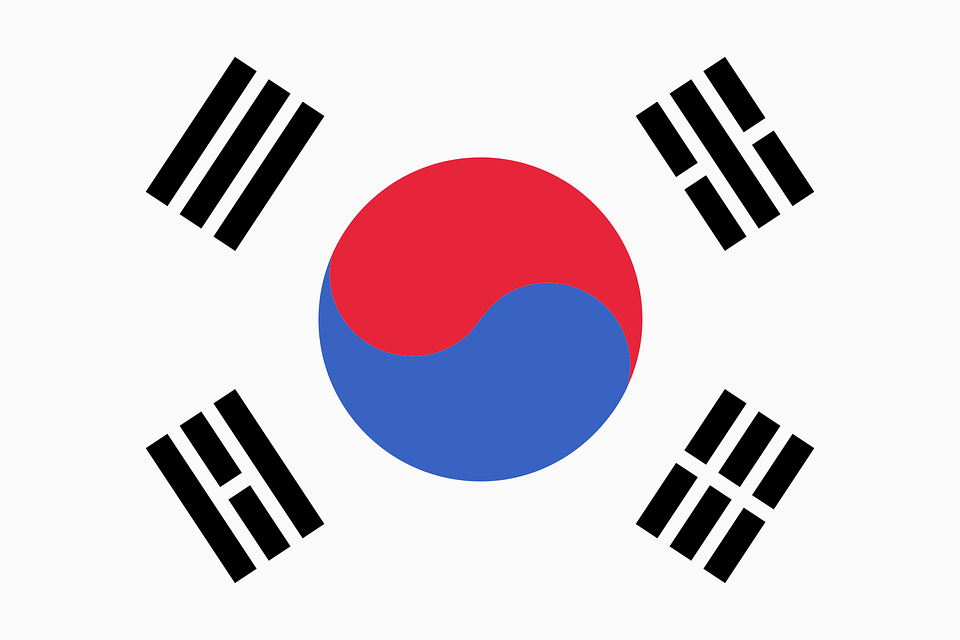

In [20]:
from PIL import Image
import numpy as np

img = Image.open('flag.png')
img

In [26]:
np_img_array = np.array(img.getdata())
np_img_array.shape

(614400, 3)

In [30]:
from torchvision import transforms as transforms
result = transforms.ToTensor()(img)

In [31]:
result.shape

torch.Size([3, 640, 960])

In [37]:
img_array = transforms.ToPILImage()(result).convert("RGB")
img_array.size

(960, 640)

In [42]:
type(img_array)

PIL.Image.Image

## MNIST 

In [45]:
!pip install --user idx2numpy


  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=37fb08eca394436ba0c3a08c5e10899c8509a4a126daf169b369a36742419e1a
  Stored in directory: /home/work/.cache/pip/wheels/e7/34/28/e6938b3277d94e90acb425f0ea451fd3d4be7713e13f19966f
Successfully built idx2numpy


In [46]:
import idx2numpy
import numpy as np
file = 'train-images-idx3-ubyte'
arr = idx2numpy.convert_from_file(file)

In [48]:
arr.shape


(60000, 28, 28)